# 1. Pipeline

### 1.A Check working directory

In [1]:
import os
os.getcwd()

'/Users/corybaird/Desktop/graspp_2025_spring/notebooks/module_3'

In [2]:
os.chdir("../../")
os.getcwd()

'/Users/corybaird/Desktop/graspp_2025_spring'

## 1.1 Download Data

In [3]:
from src.data.download_worldbank import DownloadWorldBank

In [32]:
download_wb = DownloadWorldBank(
    indicators=['BX.KLT.DINV.WD.GD.ZS', 'MS.MIL.XPND.GD.ZS', 'NY.GDP.MKTP.CD', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS'],
    countries=['US', 'CA', 'MX', 'JP'],
    date_start='1990',
    date_end='2023'
)

df_wb_raw = download_wb.run(save_data = False)
df_wb_raw.head(2)

Processing indicator: BX.KLT.DINV.WD.GD.ZS
Processing indicator: MS.MIL.XPND.GD.ZS
Processing indicator: NY.GDP.MKTP.CD
Processing indicator: NE.EXP.GNFS.ZS
Processing indicator: NE.IMP.GNFS.ZS


series,country,date,BX.KLT.DINV.WD.GD.ZS,MS.MIL.XPND.GD.ZS,NY.GDP.MKTP.CD,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS
0,CAN,1990-01-01,1.409504,1.958794,5.960756e+11,25.074299,24.920165
1,CAN,1991-01-01,0.573724,1.895444,6.125277e+11,24.353317,24.870150


## 1.2. Transform

In [33]:
from src.features.generate_features import GenerateFeatures
transform_tool = GenerateFeatures(
    rolling_window = 3,
    features = ["changepct", "changeraw", "rollingmean", "log", "zscore", "lag1", "lag2"],
    time_period = 'YE'
)

In [34]:
df_wb_feat = transform_tool.transform(df_wb_raw)
df_wb_feat.head(2)

,country,date,BX.KLT.DINV.WD.GD.ZS,MS.MIL.XPND.GD.ZS,NY.GDP.MKTP.CD,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,BX.KLT.DINV.WD.GD.ZS_chraw1YE,MS.MIL.XPND.GD.ZS_chraw1YE,NY.GDP.MKTP.CD_chraw1YE,...,BX.KLT.DINV.WD.GD.ZS_lag2YE,MS.MIL.XPND.GD.ZS_lag2YE,NY.GDP.MKTP.CD_lag2YE,NE.EXP.GNFS.ZS_lag2YE,NE.IMP.GNFS.ZS_lag2YE,BX.KLT.DINV.WD.GD.ZS_zscoreYE,MS.MIL.XPND.GD.ZS_zscoreYE,NY.GDP.MKTP.CD_zscoreYE,NE.EXP.GNFS.ZS_zscoreYE,NE.IMP.GNFS.ZS_zscoreYE
0,CAN,1990-01-01,1.409504,1.958794,5.960756e+11,25.074299,24.920165,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.718364,2.568489,-1.211509,-1.786018,-2.506791
1,CAN,1991-01-01,0.573724,1.895444,6.125277e+11,24.353317,24.870150,-0.83578,-0.063349,1.645212e+10,...,NaN,NaN,NaN,NaN,NaN,-1.163844,2.318356,-1.180728,-1.938141,-2.522882


## 1.3 Running the pipeline from one file

### 1.3.1 Bootleg

In [4]:
import run_analysis

Step 1: Download
Processing indicator: BX.KLT.DINV.WD.GD.ZS
Processing indicator: MS.MIL.XPND.GD.ZS
Processing indicator: NY.GDP.MKTP.CD
Processing indicator: NE.EXP.GNFS.ZS
Processing indicator: NE.IMP.GNFS.ZS
Step 2: Transform
Saved features here: data/features/wb_feat.csv


### 1.3.2 Advanced

In [7]:
from run_analysis_advanced import RunAnalysis

In [8]:
analysis_runner = RunAnalysis()
analysis_runner.run()

Step 1: Download
Processing indicator: BX.KLT.DINV.WD.GD.ZS
Processing indicator: MS.MIL.XPND.GD.ZS
Processing indicator: NY.GDP.MKTP.CD
Processing indicator: NE.EXP.GNFS.ZS
Processing indicator: NE.IMP.GNFS.ZS
series country       date  BX.KLT.DINV.WD.GD.ZS  MS.MIL.XPND.GD.ZS  \
0          CAN 2020-01-01              1.758971           1.400836   
1          CAN 2021-01-01              2.998283           1.267294   

series  NY.GDP.MKTP.CD  NE.EXP.GNFS.ZS  NE.IMP.GNFS.ZS  
0         1.655685e+12       29.473647       31.683124  
1         2.007472e+12       31.216353       31.207811  

Step 2: Transform
Saved features here: data/features/wb_feat.csv

Step 3: Visualization (Implementation Placeholder)
Visualization steps would be executed here if the module exists and data is available.


# 2. Adding viz and regression to the pipeline

In [121]:
from src.viz.plot_basic import PlotBasic

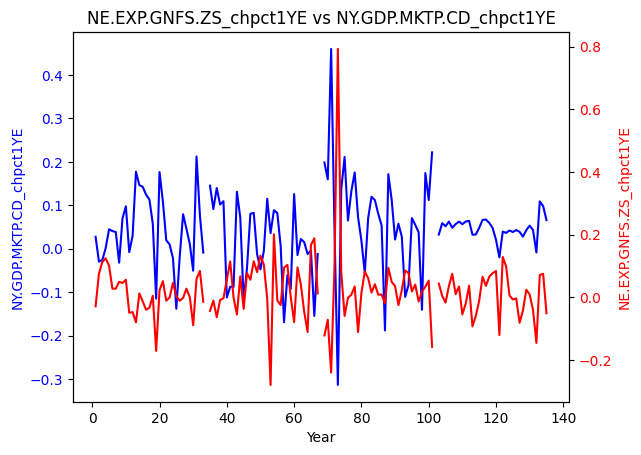

In [123]:
viz = PlotBasic()
viz.plot_timeseries(
        df=df_wb_feat,
    y_data='NE.EXP.GNFS.ZS',
    y_feat='chpct1YE',
    x_data='NY.GDP.MKTP.CD',
    x_feat='chpct1YE',
    x_label='GDP Growth',
    y_label='Export Growth'
)

/Users/corybaird/Desktop/graspp_2025_spring/src/viz/plot_basic.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


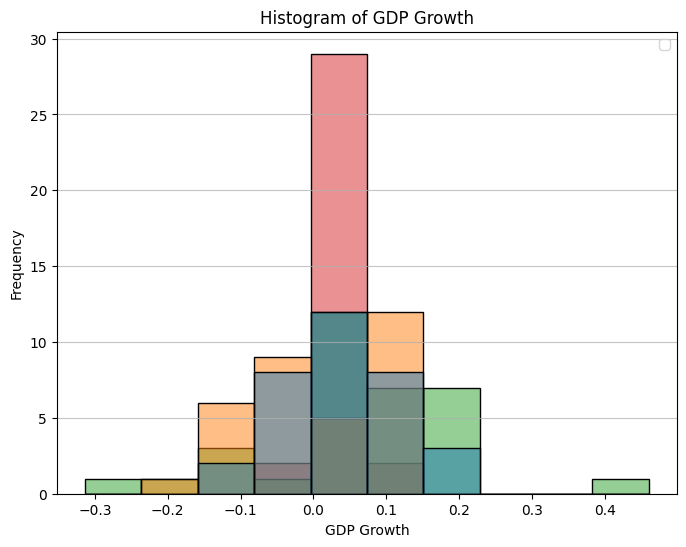

In [125]:
viz.plot_histogram(
    df=df_wb_feat,
    data_col='NY.GDP.MKTP.CD',
    feature='chpct1YE',
    label='GDP Growth',
    title='Histogram of GDP Growth',
)

                               OLS Regression Results                              
Dep. Variable:     NE.EXP.GNFS.ZS_chpct1YE   R-squared:                       0.171
Model:                                 OLS   Adj. R-squared:                  0.165
Method:                      Least Squares   F-statistic:                     26.87
Date:                     Fri, 16 May 2025   Prob (F-statistic):           8.11e-07
Time:                             10:36:11   Log-Likelihood:                 127.72
No. Observations:                      132   AIC:                            -251.4
Df Residuals:                          130   BIC:                            -245.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

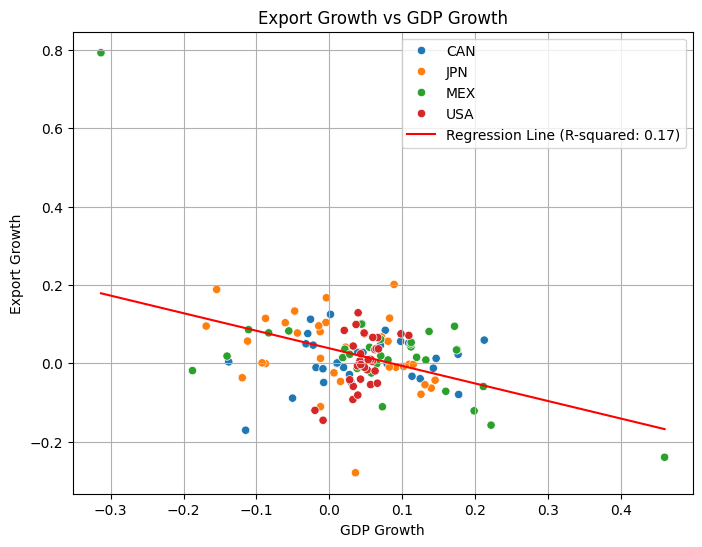

In [126]:
viz.plot_scatter(
    df=df_wb_feat,
    y_data='NE.EXP.GNFS.ZS',
    y_feat='chpct1YE',
    x_data='NY.GDP.MKTP.CD',
    x_feat='chpct1YE',
    x_label='GDP Growth',
    y_label='Export Growth'
)

## 2.1 Plots

### 2.1.1 Timeseries

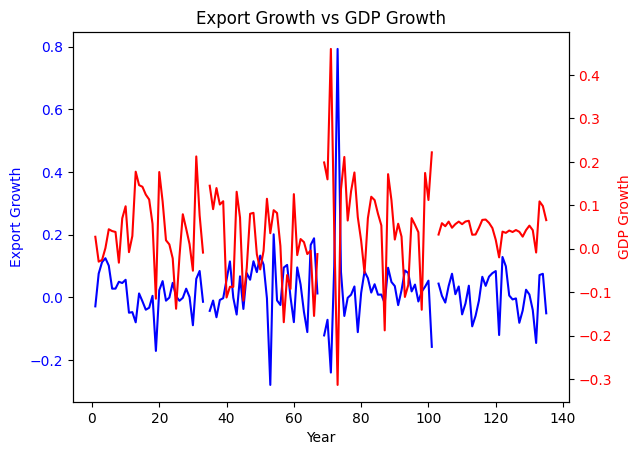

In [52]:
import matplotlib.pyplot as plt

def plot_timeseries(df, data_1, feat_1, label_1, data_2, feat_2, label_2):
    fig, ax1 = plt.subplots()

    df[f"{data_1}_{feat_1}" if feat_1 else data_1].plot(ax=ax1, color='blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel(label_1, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    df[f"{data_2}_{feat_2}" if feat_2 else data_2].plot(ax=ax2, color='red')
    ax2.set_ylabel(label_2, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    plt.title(f'{label_1} vs {label_2}')
    plt.show()

plot_timeseries(
    df=df_wb_feat,
    data_1='NE.EXP.GNFS.ZS',
    feat_1='chpct1YE',
    label_1='Export Growth',
    data_2='NY.GDP.MKTP.CD',
    feat_2='chpct1YE',
    label_2='GDP Growth'
)

### 2.1.2 Plot Scatter

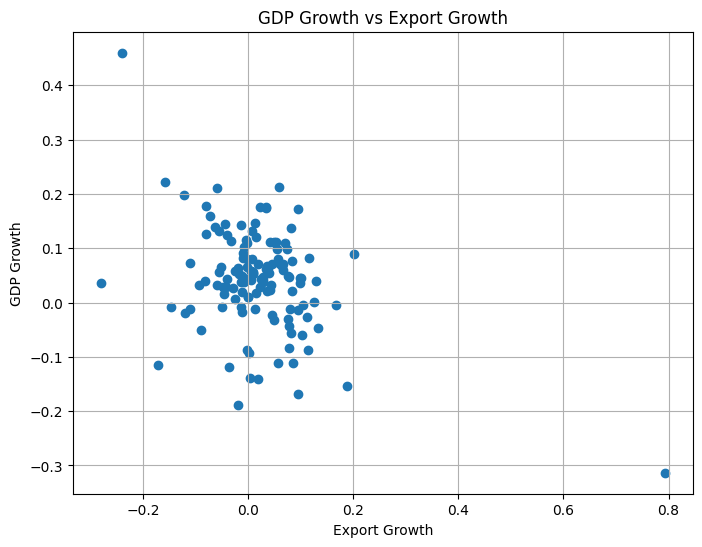

In [54]:
import matplotlib.pyplot as plt

def plot_scatterplot(df, x_data, x_feat, x_label, y_data, y_feat, y_label):
    x_col = f"{x_data}_{x_feat}" if x_feat else x_data
    y_col = f"{y_data}_{y_feat}" if y_feat else y_data

    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{y_label} vs {x_label}')
    plt.grid(True)
    plt.show()

plot_scatterplot(
    df=df_wb_feat,
    x_data='NE.EXP.GNFS.ZS',
    x_feat='chpct1YE',
    x_label='Export Growth',
    y_data='NY.GDP.MKTP.CD',
    y_feat='chpct1YE',
    y_label='GDP Growth'
)

## 2.1.3 Histograms

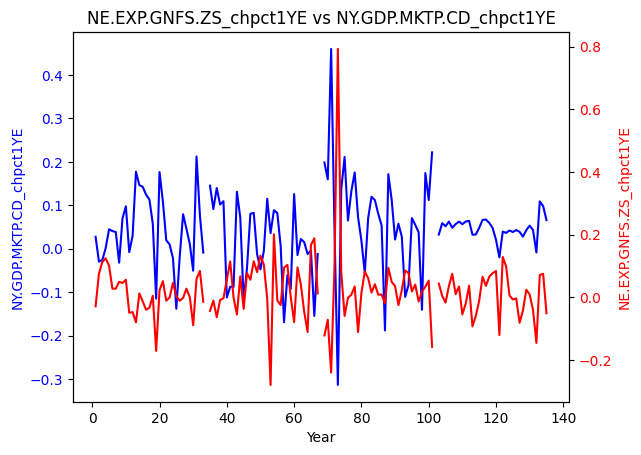

In [119]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class Viz:
    def plot_scatter(self, df, y_data, y_feat, x_data, x_feat, x_label, y_label):
        y_col = f"{y_data}_{y_feat}" if y_feat else y_data
        x_col = f"{x_data}_{x_feat}" if x_feat else x_data
        data = df[[x_col, y_col, 'country']].dropna()
        y = data[y_col]
        X = data[x_col]
        X = sm.add_constant(X)
        model = sm.OLS(y, X)
        results = model.fit()
        print(results.summary())
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data, x=x_col, y=y_col, hue = 'country')
        sns.lineplot(x=data[x_col], y=results.fittedvalues, color='red', label=f'Regression Line (R-squared: {results.rsquared:.2f})')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(f'{y_label} vs {x_label}')
        plt.grid(True)
        plt.legend()
        plt.show()

    def plot_histogram(self, df, data_col, feature=None, label='Data', title='Histogram'):
        col_name = f"{data_col}_{feature}" if feature else data_col
        bins, color, edgecolor =  10, 'skyblue', 'black'
        plt.figure(figsize=(8, 6))
        sns.histplot(df, x = col_name, bins=bins, color=color, hue = 'country', edgecolor=edgecolor)
        plt.xlabel(label)
        plt.ylabel('Frequency')
        plt.title(title)
        plt.grid(axis='y', alpha=0.75)
        plt.legend()
        plt.show()

    def plot_timeseries(self, df, y_data, y_feat, x_data, x_feat, x_label, y_label):
        y_col = f"{y_data}_{y_feat}" if y_feat else y_data
        x_col = f"{x_data}_{x_feat}" if x_feat else x_data
        
        fig, ax1 = plt.subplots()

        df[x_col].plot(ax=ax1, color='blue')
        ax1.set_xlabel('Year')
        ax1.set_ylabel(x_col, color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')
        
        ax2 = ax1.twinx()
        df[y_col].plot(ax=ax2, color='red')
        ax2.set_ylabel(y_col, color='red')
        ax2.tick_params(axis='y', labelcolor='red')
        plt.title(f'{ y_col} vs {x_col}')
        plt.show()

      

viz = Viz()
viz.plot_timeseries(
        df=df_wb_feat,
    y_data='NE.EXP.GNFS.ZS',
    y_feat='chpct1YE',
    x_data='NY.GDP.MKTP.CD',
    x_feat='chpct1YE',
    x_label='GDP Growth',
    y_label='Export Growth'
)
# viz_obj.plot_scatter(
#     df=df_wb_feat,
#     y_data='NE.EXP.GNFS.ZS',
#     y_feat='chpct1YE',
#     x_data='NY.GDP.MKTP.CD',
#     x_feat='chpct1YE',
#     x_label='GDP Growth',
#     y_label='Export Growth'
# )


# viz_obj.plot_histogram(
#     df=df_wb_feat,
#     data_col='NY.GDP.MKTP.CD',
#     feature='chpct1YE',
#     label='GDP Growth',
#     title='Histogram of GDP Growth',
# )

## 2.3 

### 1.4.1 Regression only

In [60]:
import statsmodels.api as sm
import pandas as pd

def ols_timeseries_nof(df, y_data, y_feat, x_data, x_feat):
    y_col = f"{y_data}_{y_feat}" if y_feat else y_data
    x_col = f"{x_data}_{x_feat}" if x_feat else x_data

    data = df[[x_col, y_col]].dropna()

    y = data[y_col]
    X = data[x_col]
    X = sm.add_constant(X)  # Add a constant (intercept) to the independent variable

    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())

ols_timeseries_nof(
    df=df_wb_feat,
    y_data='NE.EXP.GNFS.ZS',
    y_feat='chpct1YE',
    x_data='NY.GDP.MKTP.CD',
    x_feat='chpct1YE'
)

                               OLS Regression Results                              
Dep. Variable:     NE.EXP.GNFS.ZS_chpct1YE   R-squared:                       0.171
Model:                                 OLS   Adj. R-squared:                  0.165
Method:                      Least Squares   F-statistic:                     26.87
Date:                     Fri, 16 May 2025   Prob (F-statistic):           8.11e-07
Time:                             09:51:35   Log-Likelihood:                 127.72
No. Observations:                      132   AIC:                            -251.4
Df Residuals:                          130   BIC:                            -245.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## 1.4.2 Regression with time series

                               OLS Regression Results                              
Dep. Variable:     NE.EXP.GNFS.ZS_chpct1YE   R-squared:                       0.171
Model:                                 OLS   Adj. R-squared:                  0.165
Method:                      Least Squares   F-statistic:                     26.87
Date:                     Fri, 16 May 2025   Prob (F-statistic):           8.11e-07
Time:                             09:53:00   Log-Likelihood:                 127.72
No. Observations:                      132   AIC:                            -251.4
Df Residuals:                          130   BIC:                            -245.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

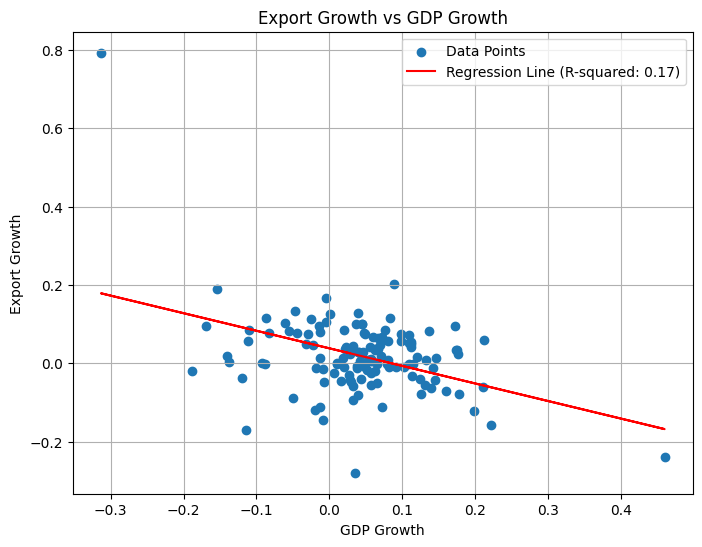

In [61]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

def ols_timeseries_with_plot(df, y_data, y_feat, x_data, x_feat, x_label, y_label):
    y_col = f"{y_data}_{y_feat}" if y_feat else y_data
    x_col = f"{x_data}_{x_feat}" if x_feat else x_data

    data = df[[x_col, y_col]].dropna()

    y = data[y_col]
    X = data[x_col]
    X = sm.add_constant(X)  # Add a constant (intercept) to the independent variable

    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())

    # Plot the scatterplot with the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col], label='Data Points')
    plt.plot(data[x_col], results.fittedvalues, 'r-', label=f'Regression Line (R-squared: {results.rsquared:.2f})')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{y_label} vs {x_label}')
    plt.grid(True)
    plt.legend()
    plt.show()

# Assuming df_wb_feat is already defined
ols_timeseries_with_plot(
    df=df_wb_feat,
    y_data='NE.EXP.GNFS.ZS',
    y_feat='chpct1YE',
    x_data='NY.GDP.MKTP.CD',
    x_feat='chpct1YE',
    x_label='GDP Growth',
    y_label='Export Growth'
)

### Note: If you change python file

#### Run the following block if you change something in the python file and want those changes reflected in the notebook


In [33]:
import importlib

In [34]:
import src.data.download_worldbank
importlib.reload(src.data.download_worldbank)
from src.data.download_worldbank import DownloadWorldBank

Processing indicator: MS.MIL.XPND.GD.ZS
Processing indicator: NY.GDP.MKTP.CD
Processing indicator: NE.EXP.GNFS.ZS
data save here: data/clean/merged_wb.csv


In [35]:
import src.features.generate_features
importlib.reload(src.features.generate_features)
from src.features.generate_features import GenerateFeatures